In [179]:
import pandas as pd
import numpy as np
my_path = r"C:\Users\user\OneDrive - Ministry of Education Rwanda - Rwanda Polytechnic (RP)\Desktop\Machine_Learnig\Housing.xls"
df = pd.read_csv(my_path)
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2.0,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4.0,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3,2.0,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,NaN,4,2.0,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,NaN,4,1.0,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000.0,2,1.0,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400.0,3,1.0,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620.0,2,1.0,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910.0,3,1.0,1,no,no,no,no,no,0,no,furnished


In [180]:
# Mean of all numerical variables
means = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']].mean()
print(means)



price        4.766729e+06
area         5.127168e+03
bedrooms     3.691743e+00
bathrooms    1.284926e+00
stories      1.805505e+00
parking      6.935780e-01
dtype: float64


In [181]:
# median of all numerical variables
medians=df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']].median()
medians

price        4340000.0
area            4540.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

In [182]:
# minimum for all numerical variables
mins=df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']].min()
mins

price        1750000.0
area            1650.0
bedrooms           1.0
bathrooms          1.0
stories            1.0
parking            0.0
dtype: float64

In [183]:
# miximum for all numerical variables
maxs=df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']].max()
maxs

price        13300000.0
area            16200.0
bedrooms          400.0
bathrooms           4.0
stories             4.0
parking             3.0
dtype: float64

In [184]:
stds=df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']].std()
stds

price        1.870440e+06
area         2.143733e+03
bedrooms     1.702314e+01
bathrooms    5.019967e-01
stories      8.674925e-01
parking      8.615858e-01
dtype: float64

In [185]:
columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
percentile_25 = df[columns].quantile(0.25)
percentile_75 = df[columns].quantile(0.75)
#this is the percentile of 25 for all numerical variable
print(percentile_25)

#this is the percentile of 75 for all numerical variables
print(percentile_75)

price        3430000.0
area            3588.0
bedrooms           2.0
bathrooms          1.0
stories            1.0
parking            0.0
Name: 0.25, dtype: float64
price        5740000.0
area            6360.0
bedrooms           3.0
bathrooms          2.0
stories            2.0
parking            1.0
Name: 0.75, dtype: float64


In [186]:
# Summary of numerical columns
num_summary = df.describe()
num_summary


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,542.000000,545.000000,544.000000,545.000000,545.000000
mean,4.766729e+06,5127.167897,3.691743,1.284926,1.805505,0.693578
std,1.870440e+06,2143.732761,17.023136,0.501997,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3588.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4540.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,400.000000,4.000000,4.000000,3.000000


# Handling Missing Values

# Detecting Missing Values


In [187]:
df.isnull().sum()

price               0
area                3
bedrooms            0
bathrooms           1
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Apply appropriate imputation techniques (mean, median, mode)



In [188]:
df = pd.read_csv(my_path)
# Fill missing values
df[df.select_dtypes('number').columns] = df.select_dtypes('number').median() 
df[df.select_dtypes('object').columns] = df.select_dtypes('object').apply(lambda x: x.fillna(x.mode()[0]))
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


# Detecting and Handling Duplicate Records


In [189]:
duplicates = df.duplicated().sum()
print("Duplicate rows:\n", duplicate_rows)


Duplicate rows:
          price    area  bedrooms  bathrooms  stories mainroad guestroom  \
10   4340000.0  4540.0       3.0        1.0      2.0      yes        no   
12   4340000.0  4540.0       3.0        1.0      2.0      yes        no   
17   4340000.0  4540.0       3.0        1.0      2.0      yes        no   
19   4340000.0  4540.0       3.0        1.0      2.0      yes        no   
22   4340000.0  4540.0       3.0        1.0      2.0      yes       yes   
..         ...     ...       ...        ...      ...      ...       ...   
540  4340000.0  4540.0       3.0        1.0      2.0      yes        no   
541  4340000.0  4540.0       3.0        1.0      2.0       no        no   
542  4340000.0  4540.0       3.0        1.0      2.0      yes        no   
543  4340000.0  4540.0       3.0        1.0      2.0       no        no   
544  4340000.0  4540.0       3.0        1.0      2.0      yes        no   

    basement hotwaterheating airconditioning  parking prefarea  \
10       yes    

# Step 2: Keep a copy of duplicates

In [190]:
duplicates_copy = df[df.duplicated(keep=False)].copy()

# Step 3: Remove duplicates from original dataset

In [ ]:
df_cleaned = df.drop_duplicates(keep='first').copy()
df_cleaned

# Step 4: reset index and also result

In [ ]:
df_cleaned = df.drop_duplicates(keep='first').copy()

# Step 3: Reset index for both DataFrames
df_cleaned.reset_index(drop=True, inplace=True)
duplicates_copy.reset_index(drop=True, inplace=True)

# Step 4: Verify
print("Cleaned dataset:\n", df_cleaned)
print("\nDuplicates kept separately:\n", duplicates_copy)

# 4 Detecting and Handling Data Inconsistency

# a. Identify any inconsistencies (e.g., incorrect data types, spelling variations in categorical values, unrealistic values, mixed units, format inconsistencies).


In [ ]:

# 2. Check for spelling/case variations in categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus', 'prefarea']
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(dropna=False))

# 3. Check for unrealistic numeric values
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
print("\nNumeric column statistics:\n", df[numeric_cols].describe())

# 4. Check for missing values
print("\nMissing values:\n", df.isna().sum())

# 5. Check for mixed units or format inconsistencies (if any)
print("\nUnique values for potential format issues:")
for col in numeric_cols:
    print(f"{col}: {df[col].unique()[:10]}")


# b. Clean, correct, or unify the inconsistent data.

In [191]:
# Clean categorical columns
for col in ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']:
    df[col] = df[col].replace({'yes':1,'no':0}).astype(int)

df['furnishingstatus'] = df['furnishingstatus'].str.lower().str.strip()

# Replace constant numeric values with median
for col in ['price','area','bedrooms','bathrooms','stories','parking']:
    if df[col].nunique() == 1:
        df[col] = df[col].median()

# Display cleaned categorical value counts
for col in ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

# Display numeric column summary
print("\nNumeric column statistics:\n", df[['price','area','bedrooms','bathrooms','stories','parking']].describe())

        



Value counts for mainroad:
mainroad
1    468
0     77
Name: count, dtype: int64

Value counts for guestroom:
guestroom
0    448
1     97
Name: count, dtype: int64

Value counts for basement:
basement
0    354
1    191
Name: count, dtype: int64

Value counts for hotwaterheating:
hotwaterheating
0    520
1     25
Name: count, dtype: int64

Value counts for airconditioning:
airconditioning
0    373
1    172
Name: count, dtype: int64

Value counts for prefarea:
prefarea
0    417
1    128
Name: count, dtype: int64

Value counts for furnishingstatus:
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

Numeric column statistics:
            price    area  bedrooms  bathrooms  stories  parking
count      545.0   545.0     545.0      545.0    545.0    545.0
mean   4340000.0  4540.0       3.0        1.0      2.0      0.0
std          0.0     0.0       0.0        0.0      0.0      0.0
min    4340000.0  4540.0       3.0        1.0      2.0

# Q5 .Detect Outliers Using IQR

a. Use appropriate outlier detection methods (IQR, Z-Score, visualization
techniques, or domain rules).

In [192]:
# IQR Outlier Detection
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))
print("IQR Outliers Count Per Column:\n")
print(outliers_iqr.sum())


IQR Outliers Count Per Column:

price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64


In [197]:
from scipy import stats
# Z-Score Outlier Detection
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers_z = (z_scores > 3)

print("Z-Score Outliers Count Per Column:\n")
print(outliers_z.sum(axis=0))

Z-Score Outliers Count Per Column:

price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64


# Z-Score Outlier Detection

# Visualization-based Outlier Detection

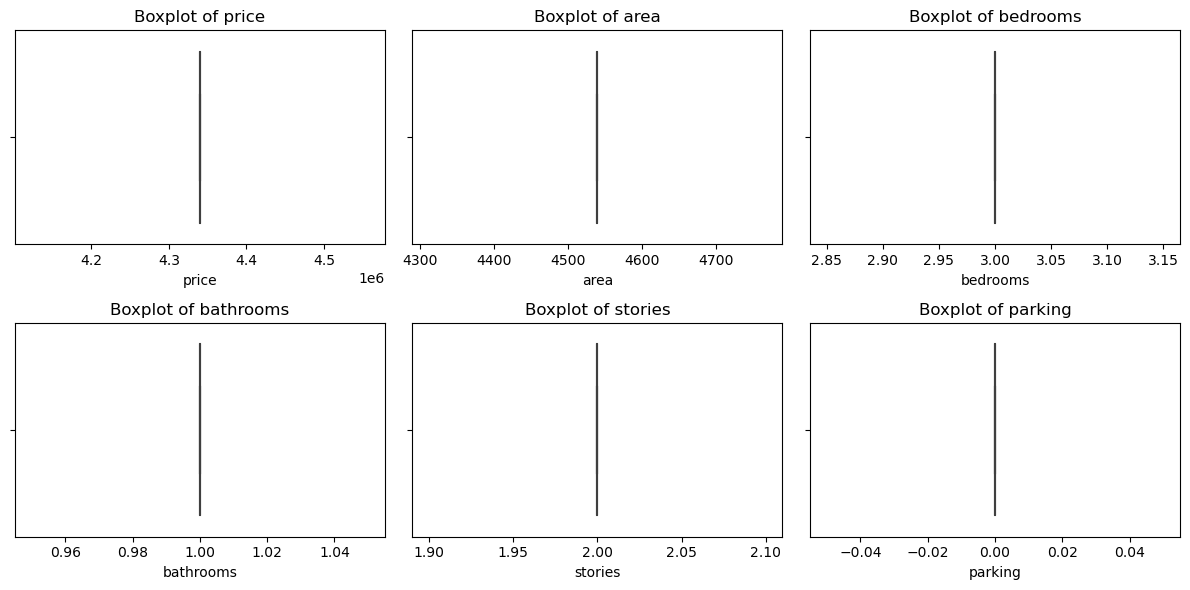

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


# 6. Normalization and Scaling

# Step 1: Identify numerical variables

In [199]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
# Numerical columns
num_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Categorical columns
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
            'airconditioning', 'prefarea', 'furnishingstatus']



# Step 3: Apply scaling

In [200]:
# 1. Min-Max Scaling for price and area (good for neural nets or KNN)
minmax_scaler = MinMaxScaler()
df[['price', 'area']] = minmax_scaler.fit_transform(df[['price', 'area']])

# 2. Standardization for small-range integers
standard_scaler = StandardScaler()
df[['bedrooms', 'bathrooms', 'stories', 'parking']] = standard_scaler.fit_transform(
    df[['bedrooms', 'bathrooms', 'stories', 'parking']]
)
robust_scaler = RobustScaler()
df[['price', 'area']] = robust_scaler.fit_transform(df[['price', 'area']])
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df_encoded.head()



,price,area,bedrooms,bathrooms,stories,parking,mainroad_1,guestroom_1,basement_1,hotwaterheating_1,airconditioning_1,prefarea_1,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,True,True,False,False
1,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,True,False,False,False
2,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False,False,True,True,False
3,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False,True,True,False,False
4,0.0,0.0,0.0,0.0,0.0,0.0,True,True,True,False,True,False,False,False


# Final dataset ready for ML

In [201]:
print(df_encoded.info())
print(df_encoded.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            545 non-null    float64
 1   area                             545 non-null    float64
 2   bedrooms                         545 non-null    float64
 3   bathrooms                        545 non-null    float64
 4   stories                          545 non-null    float64
 5   parking                          545 non-null    float64
 6   mainroad_1                       545 non-null    bool   
 7   guestroom_1                      545 non-null    bool   
 8   basement_1                       545 non-null    bool   
 9   hotwaterheating_1                545 non-null    bool   
 10  airconditioning_1                545 non-null    bool   
 11  prefarea_1                       545 non-null    bool   
 12  furnishingstatus_semi-

# b. Apply appropriate techniques such as Min-Max Scaling, Standardization (Z-score scaling), Robust Scaling

In [202]:
std_scaler = StandardScaler()
df['area_std'] = std_scaler.fit_transform(df[['area']])
df['bedrooms_std'] = std_scaler.fit_transform(df[['bedrooms']])
df['bathrooms_std'] = std_scaler.fit_transform(df[['bathrooms']])
df['stories_std'] = std_scaler.fit_transform(df[['stories']])
df['parking_std'] = std_scaler.fit_transform(df[['parking']])

# Robust Scaling - good for outliers
robust_scaler = RobustScaler()
df['price_robust'] = robust_scaler.fit_transform(df[['price']])

# Min-Max Scaling - scales between 0 and 1
minmax_scaler = MinMaxScaler()
df['price_minmax'] = minmax_scaler.fit_transform(df[['price']])
df['area_minmax'] = minmax_scaler.fit_transform(df[['area']])

# Display scaled data
df[['price','price_robust','price_minmax','area','area_std','area_minmax']].head()

,price,price_robust,price_minmax,area,area_std,area_minmax
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


# Step 1: Identify Categorical Variables

In [170]:
# Step 1: Identify categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical variables in the dataset:")
for col in categorical_cols:
    print(f"- {col}")

# Optional: view unique values for each categorical column
for col in categorical_cols:
    print(f"\nUnique values in '{col}': {df[col].unique()}")


Categorical variables in the dataset:
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea
- furnishingstatus

Unique values in 'mainroad': ['yes' 'no']

Unique values in 'guestroom': ['no' 'yes']

Unique values in 'basement': ['no' 'yes']

Unique values in 'hotwaterheating': ['no' 'yes']

Unique values in 'airconditioning': ['yes' 'no']

Unique values in 'prefarea': ['yes' 'no']

Unique values in 'furnishingstatus': ['furnished' 'semi-furnished' 'unfurnished']


# Step 2: Label Encoding

In [171]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['furnishingstatus_encoded'] = le.fit_transform(df['furnishingstatus'])

# Show before-and-after
df[['furnishingstatus', 'furnishingstatus_encoded']].head()

,furnishingstatus,furnishingstatus_encoded
0,furnished,0
1,furnished,0
2,semi-furnished,1
3,furnished,0
4,furnished,0


# One-Hot Encoding

In [172]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding for 'mainroad'
ohe = OneHotEncoder(sparse_output=False, drop='first')  # updated parameter
mainroad_encoded = ohe.fit_transform(df[['mainroad']])

# Convert to DataFrame with proper column names
mainroad_encoded_df = pd.DataFrame(mainroad_encoded, columns=ohe.get_feature_names_out(['mainroad']))

# Concatenate with original DataFrame
df = pd.concat([df, mainroad_encoded_df], axis=1)

# Show before-and-after
df[['mainroad'] + list(mainroad_encoded_df.columns)].head()



,mainroad,mainroad_yes,mainroad_yes
0,yes,1.0,1.0
1,yes,1.0,1.0
2,yes,1.0,1.0
3,yes,1.0,1.0
4,yes,1.0,1.0


# Step 4: Binary Encoding

In [176]:
# Example: 'guestroom' (yes/no)
df['guestroom_binary'] = df['guestroom'].map({'yes': 1, 'no': 0})
df[['guestroom', 'guestroom_binary']].head()



,guestroom,guestroom_binary
0,no,0
1,no,0
2,no,0
3,no,0
4,yes,1


In [174]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal Encoding for 'furnishingstatus' (values: 'furnished', 'semi-furnished', 'unfurnished')
ordinal_encoder = OrdinalEncoder(categories=[['unfurnished', 'semi-furnished', 'furnished']])
df['furnishingstatus_encoded'] = ordinal_encoder.fit_transform(df[['furnishingstatus']])

# Show results
df[['furnishingstatus', 'furnishingstatus_encoded']].head()


,furnishingstatus,furnishingstatus_encoded
0,furnished,2.0
1,furnished,2.0
2,semi-furnished,1.0
3,furnished,2.0
4,furnished,2.0


# Ordinal Encoding

In [177]:
# Example: 'furnishingstatus' (ordinal: unfurnished < semi-furnished < furnished)
ordinal_mapping = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
df['furnishingstatus_ordinal'] = df['furnishingstatus'].map(ordinal_mapping)
df[['furnishingstatus', 'furnishingstatus_ordinal']].head()


,furnishingstatus,furnishingstatus_ordinal
0,furnished,2
1,furnished,2
2,semi-furnished,1
3,furnished,2
4,furnished,2


# Target Encoding

In [178]:
# Example: encode 'prefarea' based on average 'price'
target_mean = df.groupby('prefarea')['price'].mean()
df['prefarea_target'] = df['prefarea'].map(target_mean)

df[['prefarea', 'prefarea_target']].head()


,prefarea,prefarea_target
0,yes,0.666254
1,no,0.036926
2,yes,0.666254
3,yes,0.666254
4,no,0.036926
